# <center> <font style="color:rgb(100,109,254)"> Feature Detectors & Descriptors in Opencv </font> </center>

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## <font style="color:rgb(134,19,348)"> Using SIFT & SURF In Opencv   </font>

Some changes in Opencv's API has been made so now if you want to use sift or surf there are two methods:

- **1.** (Recommended way): Install Opencv from source and enable the Non-Free flag.
- **2.** Create a virtual environment with python 3.6 and install opencv version 3.3 or lower with this command `pip install opencv-contrib-python==3.3.0.10`. Also make sure to install a Jupyter notebook for that environment.

If you have installed opencv from source then you're good to go and if not then create a virtual env as described and start the jupyter notebook from there.

**Check to make sure you're running Opencv 3.3 or below if you didn't installed from source**

In [2]:
cv2.__version__

'4.1.2'

## <font style="color:rgb(134,19,348)"> SIFT (Scale-Invariant Feature Transform)   </font>
Harris corner is not scale invariant. So, in 2004, **D.Lowe**, from University of British Columbia, came up with a new algorithm, Scale Invariant Feature Transform (SIFT) in his paper, **Distinctive Image Features from Scale-Invariant Keypoints**, which extract keypoints and compute its descriptors.

**You first initialize the sift detector with the following function.**

```sift = cv2.xfeatures2d.SIFT_create([, nfeatures[, nOctaveLayers[, contrastThreshold[, edgeThreshold[, sigma]]]]])```

- **`nfeatures`**	The number of best features to retain. The features are ranked by their scores (measured in SIFT algorithm as the local contrast)
- **`nOctaveLayers`**	The number of layers in each octave. 3 is the value used in D. Lowe paper. The number of octaves is computed automatically from the image resolution.
- **`contrastThreshold`**	The contrast threshold used to filter out weak features in semi-uniform (low-contrast) regions. The larger the threshold, the less features are produced by the detector.
- **`edgeThreshold`**	The threshold used to filter out edge-like features. Note that the its meaning is different from the - - **`contrastThreshold`**, i.e. the larger the edgeThreshold, the less features are filtered out (more features are retained).
- **`sigma`**	The sigma of the Gaussian applied to the input image at the octave #0. If your image is captured with a weak camera with soft lenses, you might want to reduce the number.

Then you can detect keypoints with the following function.

```	keypoints = cv2.sift.detect(image[, mask]) ```

- **`image`**	Image.
- **`keypoints`**	The detected keypoints. 
- **`mask`**	Mask specifying where to look for keypoints (optional). It must be a 8-bit integer matrix with non-zero values in the region of interest


We will perform detect features with sift then draw it with [**cv2.drawKeypoints()**](https://docs.opencv.org/master/d4/d5d/group__features2d__draw.html#ga5d2bafe8c1c45289bc3403a40fb88920)


**Resources:**
- [Learn Sift here](https://docs.opencv.org/master/da/df5/tutorial_py_sift_intro.html)
- [Original Paper on SIFT](https://www.cs.ubc.ca/~lowe/papers/ijcv04.pdf)
- [Tutorial On SIFT](http://aishack.in/tutorials/sift-scale-invariant-feature-transform-introduction/)

In [ ]:
img = cv2.imread('media/M4/tajmahal.jpeg')
orig = img.copy()

gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Initilizing the sift detector with default params
sift = cv2.xfeatures2d.SIFT_create()  

# Calling the sift detector 
kp = sift.detect(gray,None) 

# Now that we have the keypoints we can draw it with cv2.drawKeypoints()
img_normal_keypoints=cv2.drawKeypoints(orig.copy(), kp, None) 

# It will draw a circle with size of detected keypoint along with its Orientation. 
img_rich_keypoints = cv2.drawKeypoints(orig.copy(), kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) 

print("Number of Keypoints detected: {}".format(len(kp)))  

plt.figure(figsize=[20,20])
plt.subplot(311);plt.imshow(orig[...,::-1]);plt.title("Original Image")
plt.subplot(312);plt.imshow(img_normal_keypoints[...,::-1]);plt.title("Normal Keypoints")
plt.subplot(313);plt.imshow(img_rich_keypoints[...,::-1]);plt.title("Rich Keypoints")

### <font style="color:rgb(134,19,348)"> Computing SIFT Descriptors    </font>
Now to calculate the descriptor, OpenCV provides two methods, If you can already computed the keypoints then you can use it compute descriptors using the function, **sift.compute()** And if you haven't yet found keypoints, then you can directly find keypoints and descriptors in a single step with the function, **sift.detectAndCompute()**

In [ ]:
kp, des = sift.detectAndCompute(gray,None)
kp, des = sift.compute(gray,kp)
print(des.shape)

**So we have got keypoints and descriptors. Now we want to see how to match keypoints across different images. We will see that later on**

## <font style="color:rgb(134,19,348)">  SURF (Speeded-Up Robust Features)  </font>
We can use SIFT for keypoint detection and description. But it is comparatively slow and we would do well with a  speeded-up version. In 2006, three people, **Bay, Tuytelaars and Van Gool, published another paper, **“SURF: Speeded Up Robust Features”**which introduced a new algorithm called SURF. As name suggests, it is a speeded-up version of SIFT.
 
In summary, SURF adds a lot of features to improve the speed in every step. Analysis shows it is 3 times faster than SIFT while performance is comparable to SIFT. SURF is good at handling images with some blurring and rotation, but not good at handling viewpoint change and illumination changes.

``` retval	=	cv2.xfeatures2d.SURF_create([, hessianThreshold[, nOctaves[, nOctaveLayers[, extended[, upright]]]]])```

- **`hessianThreshold`**	Threshold for hessian keypoint detector used in SURF.
- **`nOctaves`**	Number of pyramid octaves the keypoint detector will use.
- **`nOctaveLayers`**	Number of octave layers within each octave.
- **`extended`**	Extended descriptor flag (true - use extended 128-element descriptors; false - use 64-element descriptors).
- **`upright`**	Up-right or rotated features flag (true - do not compute orientation of features; false - compute orientation).

**Resources:**
- [Learn more about SURF here.](https://docs.opencv.org/master/df/dd2/tutorial_py_surf_intro.html)
- [Original Paper on this Algorithm](https://www.vision.ee.ethz.ch/~surf/eccv06.pdf)
- [Tutorial on SURF](https://medium.com/analytics-vidhya/introduction-to-surf-speeded-up-robust-features-c7396d6e7c4e)

In [7]:
img = cv2.imread('media/M4/tajmahal.jpeg')
orig = img.copy()

gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Initilizing the surf detector with 2000 hessian threshold
surf = cv2.xfeatures2d.SURF_create()  

# Calling the surf detector 
kp = surf.detect(gray,None) 

# Now that we have the keypoints we can draw it with cv2.drawKeypoints()
img_normal_keypoints=cv2.drawKeypoints(orig.copy(), kp, None) 

# It will draw a circle with size of detected keypoint along with its Orientation. 
img_rich_keypoints = cv2.drawKeypoints(orig.copy(), kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) 

print("Number of Keypoints detected: {}".format(len(kp)))  

plt.figure(figsize=[25,25])
plt.subplot(131);plt.imshow(orig[...,::-1]);plt.title("Original Image")
plt.subplot(131);plt.imshow(img_normal_keypoints[...,::-1]);plt.title("Normal Keypoints")
plt.subplot(131);plt.imshow(img_rich_keypoints[...,::-1]);plt.title("Rich Keypoints")

<xfeatures2d_FREAK 0000012CFE03BA90>

**Similar to sift you can also compute surf descriptors**

In [ ]:
kp, des = surf.detectAndCompute(gray,None)
kp, des = surf.compute(gray,kp)
print(des.shape)

##  <font style="color:rgb(134,19,348)">  FAST (Features from Accelerated Segment Test)  </font>

Now the performance of above feature detectors is really good. But when looking from a real-time application point of view, they are not fast enough.

As a solution to this, FAST (Features from Accelerated Segment Test) algorithm was proposed by **Edward Rosten** and **Tom Drummond** in their paper **“Machine learning for high-speed corner detection”** in 2006 (Later revised it in 2010)
But fast is not robust to high levels of noise. It is dependant on a threshold.

**Note: Fast is a feature Detector Only, you will still need to use a separate feature descriptor.**

``` fast = cv2.FastFeatureDetector_create([, threshold[, nonmaxSuppression]]) ```


**Params:**

- **threshold:**  This is like the hessian threshold of SURF, controls how many features you detect.
- **nonmaxSuppression:** True by default, If true then overlapping points are discarded.

**Resources:**
- [Learn more about FAST here.](https://docs.opencv.org/master/df/d0c/tutorial_py_fast.html)
- [Original Paper on this Algorithm](https://www.edwardrosten.com/work/rosten_2006_machine.pdf)
- [Tutorial on FAST](https://medium.com/analytics-vidhya/introduction-to-fast-features-from-accelerated-segment-test-4ed33dde6d65)

Number of Keypoints detected: 2967


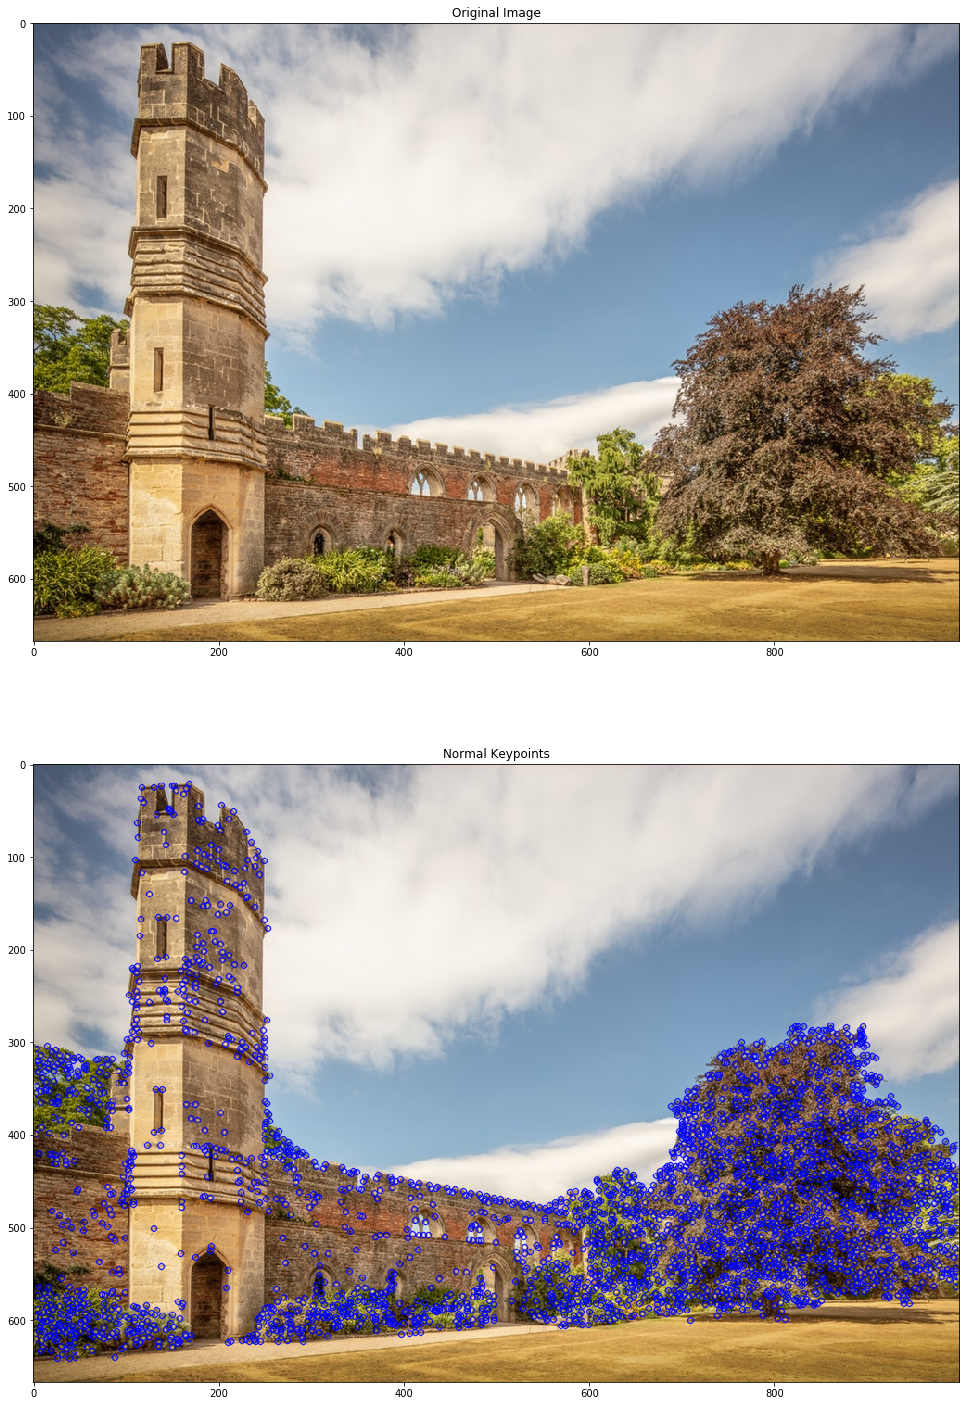

In [31]:
img = cv2.imread('media/M4/bplace.jpg')
orig = img.copy()

gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Initialize FAST object with a threshold of 50
fast = cv2.FastFeatureDetector_create(50) 

# Calling the fast detector 
kp = fast.detect(gray,None) 

# Now that we have the keypoints we can draw it with cv2.drawKeypoints()
img_keypoints = cv2.drawKeypoints(orig.copy(), kp, None, color=(255,0,0))

print("Number of Keypoints detected: {}".format(len(kp)))  

plt.figure(figsize=[25,25])
plt.subplot(211);plt.imshow(orig[...,::-1]);plt.title("Original Image")
plt.subplot(212);plt.imshow(img_keypoints[...,::-1]);plt.title("Normal Keypoints");

### You can disable nonmaxsuppression which will give you a little speed boost.

Total Keypoints without nonmaxSuppression: 5184


Text(0.5, 1.0, 'Normal Keypoints')

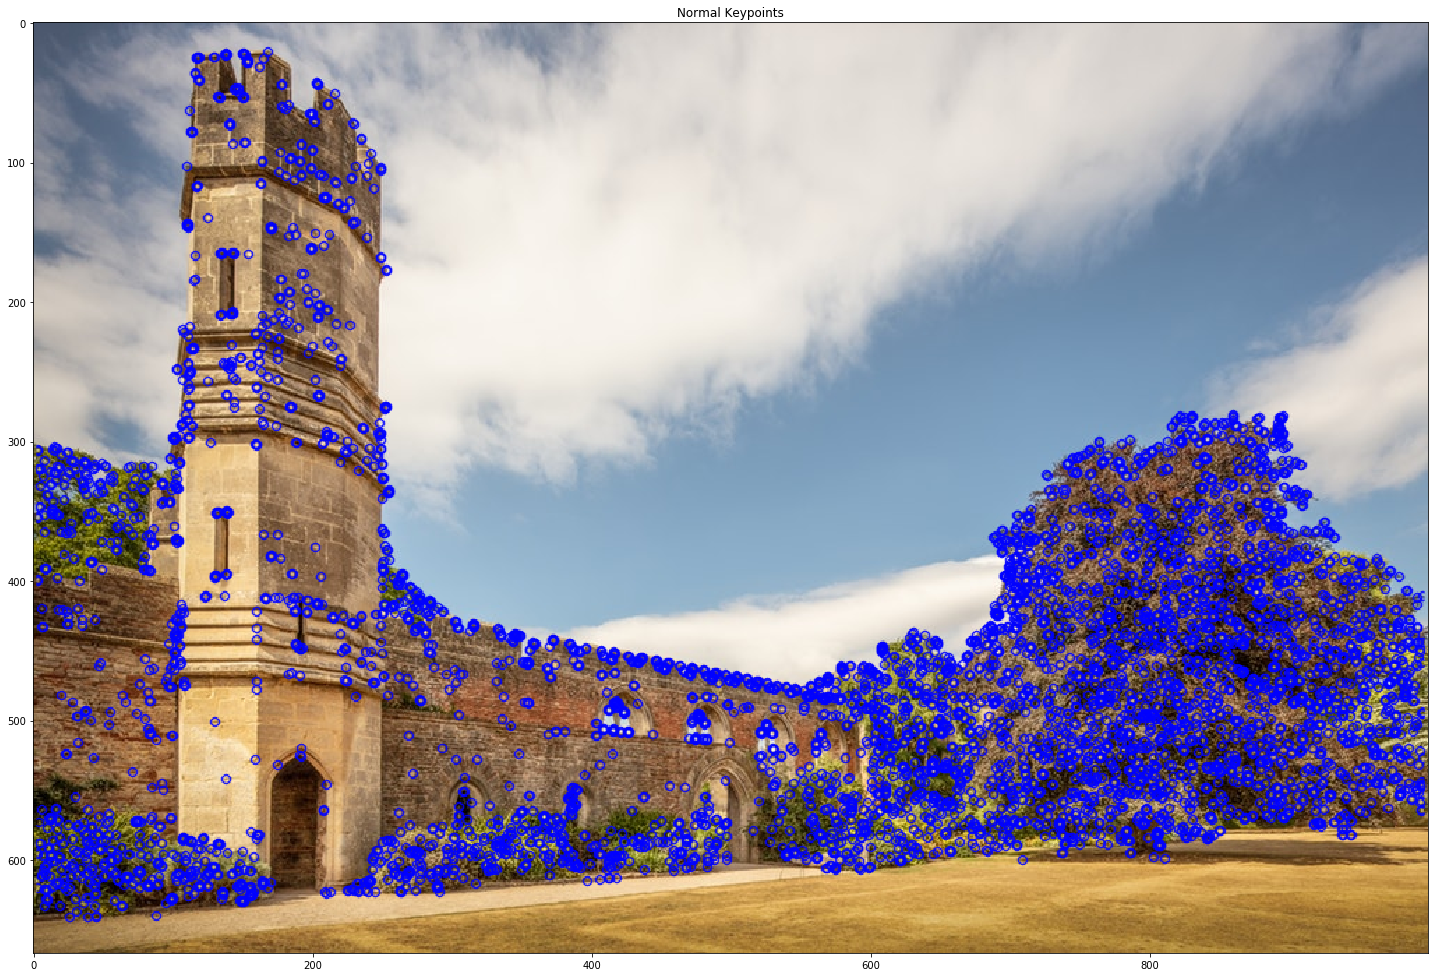

In [34]:
#Disable nonmaxSuppression
fast.setNonmaxSuppression(0)

kp = fast.detect(img,None)

print( "Total Keypoints without nonmaxSuppression: {}".format(len(kp)) )

img_keypoints = cv2.drawKeypoints(orig.copy(), kp, None, color=(255,0,0))

plt.figure(figsize=[25,25])
plt.imshow(img_keypoints[...,::-1]);plt.title("Normal Keypoints")

## <font style="color:rgb(134,19,348)"> BRIEF (Binary Robust Independent Elementary Features)   </font>

Now SIFT uses 128-dim vector for descriptors. Since it is using floating point numbers, it takes basically 512 bytes. Similarly SURF also takes minimum of 256 bytes (for 64-dim). Creating such a vector for thousands of features takes a lot of memory which are not feasible for resouce-constraint applications especially for embedded systems. Larger the memory, longer the time it takes for matching.

So here brief comes into rescue as this algorithm provides faster descriptor computation
 
**Note: BRIEF is a feature descriptor, it doesn't provide any method to find the features. So you will have to use any other feature detectors like SIFT, SURF etc.**

``` brief = cv2.xfeatures2d.BriefDescriptorExtractor_create([, bytes[, use_orientation]]) ```

**Params**

- **bytes**	length of the descriptor in bytes, valid values are: 16, 32 (default) or 64 .
- **use_orientation**	sample patterns using keypoints orientation, disabled by default.

In short, BRIEF is a faster method feature descriptor calculation and matching. It also provides high recognition rate unless there is large in-plane rotation.

**Resources:**
- [Learn more about BRIEF here.](https://docs.opencv.org/master/dc/d7d/tutorial_py_brief.html)
- [Original Paper on this Algorithm](https://www.cs.ubc.ca/~lowe/525/papers/calonder_eccv10.pdf)
- [Tutorial on BRIEF](https://medium.com/analytics-vidhya/introduction-to-brief-binary-robust-independent-elementary-features-436f4a31a0e6)

In [35]:
# Initialize the BRIEF extractor
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

# compute the descriptors with BRIEF using the keypoints from fast
kp, des = brief.compute(img, kp)
print(des.shape)

(4870, 32)


Note: Although we're using FAST detector with brief, its worth noting that the paper recommends using CenSurE detector (called STAR detector in Opencv) with Brief.

##   <font style="color:rgb(134,19,348)">  ORB (Oriented FAST and Rotated BRIEF)  </font>

Now ORB directly came from "OpenCV Labs". This algorithm was brought up by **Ethan Rublee**, **Vincent Rabaud**, **Kurt Konolige** and **Gary R. Bradski** in their paper **ORB: An efficient alternative to SIFT or SURF in 2011.** As the title says, it is a good alternative to SIFT and SURF in computation cost, matching performance and mainly the patents. Yes, SIFT and SURF are patented and you are supposed to pay them for its use. But ORB is not, Also I think the patents only cover Europe.

In Summary, ORB is basically a fusion of FAST keypoint detector and BRIEF descriptor with many modifications to enhance the performance.

``` ORB = cv2.ORB_create([, nfeatures[, scaleFactor[, nlevels[, edgeThreshold[, firstLevel[, WTA_K[, scoreType[, patchSize [, fastThreshold]]]]]]]]]) ```

- **`nfeatures`**	The maximum number of features to retain.
- **`scaleFactor`**	Pyramid decimation ratio, greater than 1. scaleFactor==2 means the classical pyramid, where each next level has 4x less pixels than the previous, but such a big scale factor will degrade feature matching scores dramatically. On the other hand, too close to 1 scale factor will mean that to cover certain scale range you will need more pyramid levels and so the speed will suffer.
- **`nlevels`**	The number of pyramid levels. The smallest level will have linear size equal to input_image_linear_size/pow(scaleFactor, nlevels - firstLevel).
- **`edgeThreshold`**	This is size of the border where the features are not detected. It should roughly match the patch Size parameter.
- **`firstLevel`**	The level of pyramid to put source image to. Previous layers are filled with upscaled source image.
- **`WTA_K`**	The number of points that produce each element of the oriented BRIEF descriptor. The default value 2 means the BRIEF where we take a random point pair and compare their brightnesses, so we get 0/1 response. Other possible values are 3 and 4. For example, 3 means that we take 3 random points (of course, those point coordinates are random, but they are generated from the pre-defined seed, so each element of BRIEF descriptor is computed deterministically from the pixel rectangle), find point of maximum brightness and output index of the winner (0, 1 or 2). Such output will occupy 2 bits, and therefore it will need a special variant of Hamming distance, denoted as NORM_HAMMING2 (2 bits per bin). When WTA_K=4, we take 4 random points to compute each bin (that will also occupy 2 bits with possible values 0, 1, 2 or 3).
- **`scoreType`**	The default HARRIS_SCORE means that Harris algorithm is used to rank features (the score is written to KeyPoint::score and is used to retain best nfeatures features); FAST_SCORE is alternative value of the parameter that produces slightly less stable keypoints, but it is a little faster to compute.
- **`patchSize`**	size of the patch used by the oriented BRIEF descriptor. Of course, on smaller pyramid layers the perceived image area covered by a feature will be larger.
- **`fastThreshold`**	the fast threshold

**Resources:**
- [Learn more about ORB here.](https://docs.opencv.org/master/d1/d89/tutorial_py_orb.html)
- [Original Paper on this Algorithm](http://www.willowgarage.com/sites/default/files/orb_final.pdf)
- [Tutorial on ORB](https://medium.com/analytics-vidhya/introduction-to-orb-oriented-fast-and-rotated-brief-4220e8ec40cf)

The descriptors shape: (1200, 32) and the number of keypoints detected: 1200


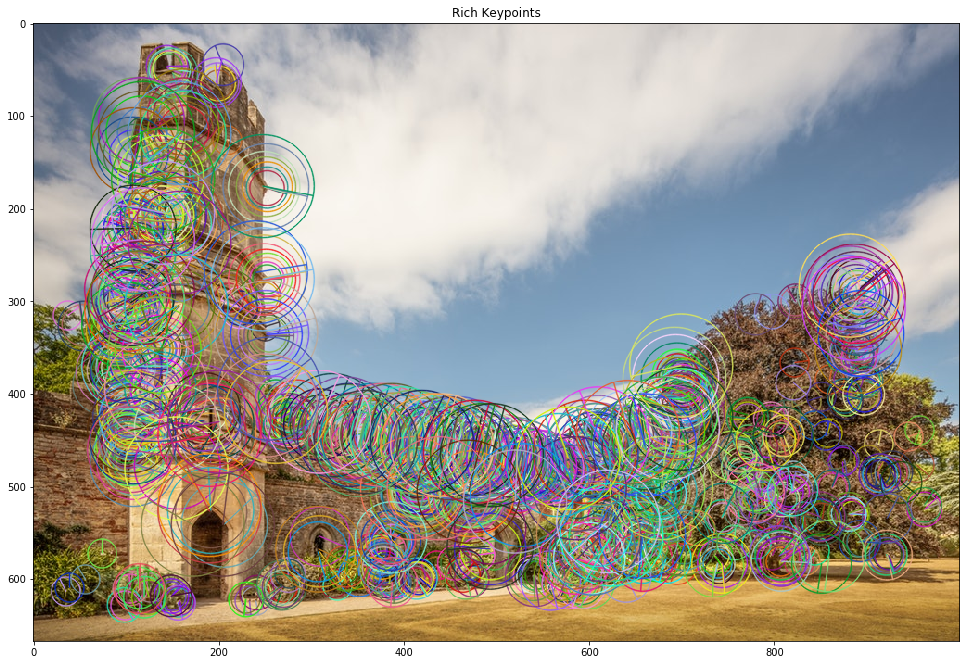

In [8]:
img = cv2.imread('media/M4/bplace.jpg')
orig = img.copy()

gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Initilizing orb detector with threshold nfeatures 1000
orb = cv2.ORB_create(1200)

# Calling the orb detector 
kp, des = orb.detectAndCompute(gray, None) 

print('The descriptors shape: {} and the number of keypoints detected: {}'.format(des.shape,len(kp)))

# It will draw a circle with size of detected keypoint along with its Orientation. 
img_rich_keypoints = cv2.drawKeypoints(orig.copy(), kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) 


plt.figure(figsize=[25,25])
plt.subplot(212);plt.imshow(img_rich_keypoints[...,::-1]);plt.title("Rich Keypoints");

## <font style="color:rgb(134,19,348)">  Finally take a look at these 3 Efficient feature Detectors with Descriptors.   </font>

### <font style="color:rgb(134,19,348)">Kaze ( 2012 )    </font>

```kaze = cv2.KAZE_create([, extended[, upright[, threshold[, nOctaves[, nOctaveLayers[, diffusivity]]]]]])```

- **extended**	Set to enable extraction of extended (128-byte) descriptor.
- **upright**	Set to enable use of upright descriptors (non rotation-invariant).
- **threshold**	Detector response threshold to accept point
- **nOctaves**	Maximum octave evolution of the image
- **nOctaveLayers**	Default number of sub levels per scale level
- **diffusivity**	Diffusivity type. DIFF_PM_G1, DIFF_PM_G2, DIFF_WEICKERT or DIFF_CHARBONNIER


[Original Paper on this Algorithm](https://www.doc.ic.ac.uk/~ajd/Publications/alcantarilla_etal_eccv2012.pdf)

### <font style="color:rgb(134,19,348)"> Akaze ( 2011 )   </font>

```retval = cv2.AKAZE_create([, descriptor_type[, descriptor_size[, descriptor_channels[, threshold[, nOctaves[, nOctaveLayers[, diffusivity]]]]]]] )```

**Params:**

- **descriptor_type**	Type of the extracted descriptor: DESCRIPTOR_KAZE, DESCRIPTOR_KAZE_UPRIGHT, DESCRIPTOR_MLDB or DESCRIPTOR_MLDB_UPRIGHT.
- **descriptor_size**	Size of the descriptor in bits. 0 -> Full size
- **descriptor_channels**	Number of channels in the descriptor (1, 2, 3)
- **threshold**	Detector response threshold to accept point
- **nOctaves**	Maximum octave evolution of the image
- **nOctaveLayers**	Default number of sub levels per scale level
- **diffusivity**	Diffusivity type. DIFF_PM_G1, DIFF_PM_G2, DIFF_WEICKERT or DIFF_CHARBONNIER

[Original Paper on this Algorithm](http://www.bmva.org/bmvc/2013/Papers/paper0013/paper0013.pdf)


### <font style="color:rgb(134,19,348)">  BRISK ( 2011 )  </font>

```retval = cv2.BRISK_create( thresh, octaves, radiusList, numberList[, dMax[, dMin[, indexChange]]])```

**Params:**

- **thresh**	AGAST detection threshold score.
- **octaves**	detection octaves. Use 0 to do single scale.
- **radiusList**	defines the radii (in pixels) where the samples around a keypoint are taken (for keypoint scale 1).
- **numberList**	defines the number of sampling points on the sampling circle. Must be the same size as radiusList..
- **dMax**	threshold for the short pairings used for descriptor formation (in pixels for keypoint scale 1).
- **dMin**	threshold for the long pairings used for orientation determination (in pixels for keypoint scale 1).
- **indexChange**	index remapping of the bits.

[Original Paper on this Algorithm](http://www.margaritachli.com/papers/ICCV2011paper.pdf)

#KAZE keypoints: 2998, descriptors: (2998, 64)
#AKAZE keypoints: 2643, descriptors: (2643, 61)
#BRISK keypoints: 4116, descriptors: (4116, 64)


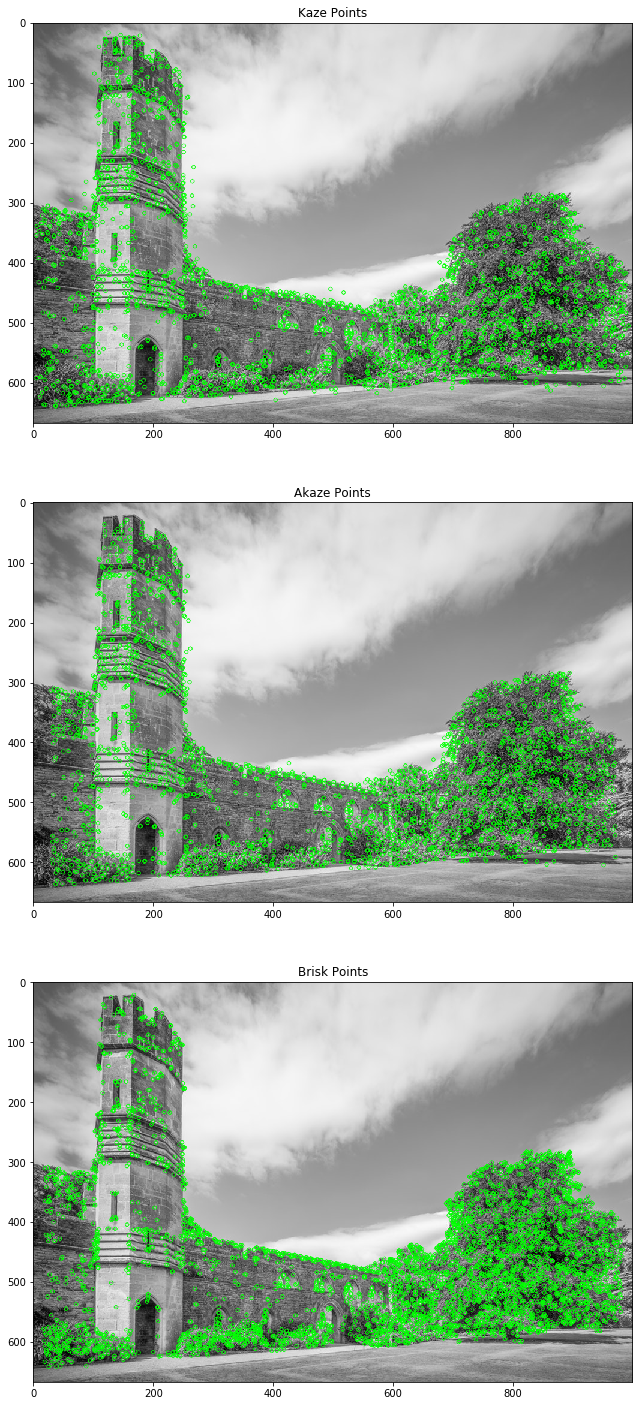

In [47]:
img = cv2.imread('media/M4/bplace.jpg',0)

kaze = cv2.KAZE_create()
kp, des = kaze.detectAndCompute(img, None)

print("#KAZE keypoints: {}, descriptors: {}".format(len(kp), des.shape))
img_kaze = cv2.drawKeypoints(img.copy(), kp, None, color=(0,255,0))

akaze = cv2.AKAZE_create()
kp, des = akaze.detectAndCompute(img, None)

print("#AKAZE keypoints: {}, descriptors: {}".format(len(kp), des.shape))
img_akaze = cv2.drawKeypoints(img.copy(), kp, None, color=(0,255,0))

brisk=cv2.BRISK_create(50)
kp = brisk.detect(img,None)
kp, des = brisk.compute(img, kp)

print("#BRISK keypoints: {}, descriptors: {}".format(len(kp), des.shape))
img_brisk = cv2.drawKeypoints(img.copy(), kp, None, color=(0,255,0))

plt.figure(figsize=[25,25])
plt.subplot(311);plt.imshow(img_kaze[...,::-1]);plt.title("Kaze Points")
plt.subplot(312);plt.imshow(img_akaze[...,::-1]);plt.title("Akaze Points");
plt.subplot(313);plt.imshow(img_brisk[...,::-1]);plt.title("Brisk Points");

## <font style="color:rgb(134,19,348)">  Where to get Other Feature Detectors and Descriptors  </font>

**There are 20 plus Feature Detectors & Descriptors in Opencv, You can see a [list of all of them here](https://docs.opencv.org/master/d0/d13/classcv_1_1Feature2D.html#details), now those detectors implemented under the `xfeatures2d` module will only be available if have installed Opencv Contrib module along with Opencv using `pip install opencv-contrib-python` , you can see a list of all extra modules that you install with the contrib package [here](https://docs.opencv.org/master/).**